In [1]:
import matplotlib as mpl

In [2]:
import pymc3 as pm


In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

# Initialize random number generator
np.random.seed(123)

# True parameter values
alpha, sigma = 1, 1
beta = [1, 2.5]

# Size of dataset
size = 100

# Predictor variable
X1 = np.random.randn(size)
X2 = np.random.randn(size) * 0.2

# Simulate outcome variable
Y = alpha + beta[0]*X1 + beta[1]*X2 + np.random.randn(size)*sigma

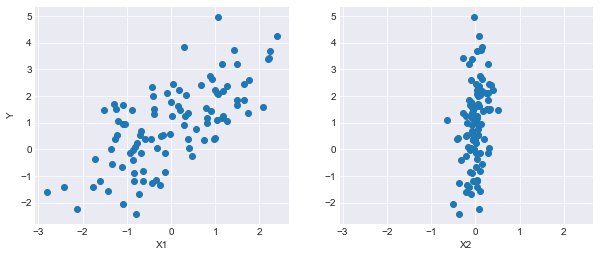

In [4]:
%matplotlib inline

fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,4))
axes[0].scatter(X1, Y)
axes[1].scatter(X2, Y)
axes[0].set_ylabel('Y'); axes[0].set_xlabel('X1'); axes[1].set_xlabel('X2');

In [5]:
basic_model = pm.Model()

with basic_model:

    # Priors for unknown model parameters
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=10, shape=2)
    sigma = pm.HalfNormal('sigma', sd=1)

    # Expected value of outcome
    mu = alpha + beta[0]*X1 + beta[1]*X2

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal('Y_obs', mu=mu, sd=sigma, observed=Y)

In [6]:
map_estimate = pm.find_MAP(model=basic_model)

map_estimate

Optimization terminated successfully.
         Current function value: 149.017982
         Iterations: 15
         Function evaluations: 21
         Gradient evaluations: 21


{'alpha': array(0.9065985664354854),
 'beta': array([ 0.948486  ,  2.60705513]),
 'sigma_log__': array(-0.032781468548420914)}

In [ ]:
with basic_model:
    # draw 500 posterior samples
    trace = pm.sample(500)

Auto-assigning NUTS sampler...
Initializing NUTS using ADVI...


In [5]:
import pandas as pd
import pyfolio as pf

/anaconda3/envs/env_alphatools_stable/lib/python3.5/site-packages/sklearn/utils/fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


In [6]:
results = pd.read_pickle('../alphatools/misc/outfile.pickle')

In [7]:
returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(results)

/anaconda3/envs/env_alphatools_stable/lib/python3.5/site-packages/pyfolio/tears.py:514: UserWarning: The latest version of pyfolio requires users to supply benchmark returns. Your current tearsheets will not include plots and analyses that require a benchmark. In the future, please pass benchmark_rets, or pass None to silence this warning.
  warnings.warn(BENCHMARK_RETS_WARNING)


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,85.87,2016-07-26,2017-11-22,NaT,NaN
1,35.62,2016-04-18,2016-04-22,2016-04-29,10
2,14.99,2016-05-06,2016-07-19,2016-07-20,54
3,13.19,2016-05-02,2016-05-03,2016-05-06,5
4,0.00,2016-01-04,2016-01-04,2016-01-04,1


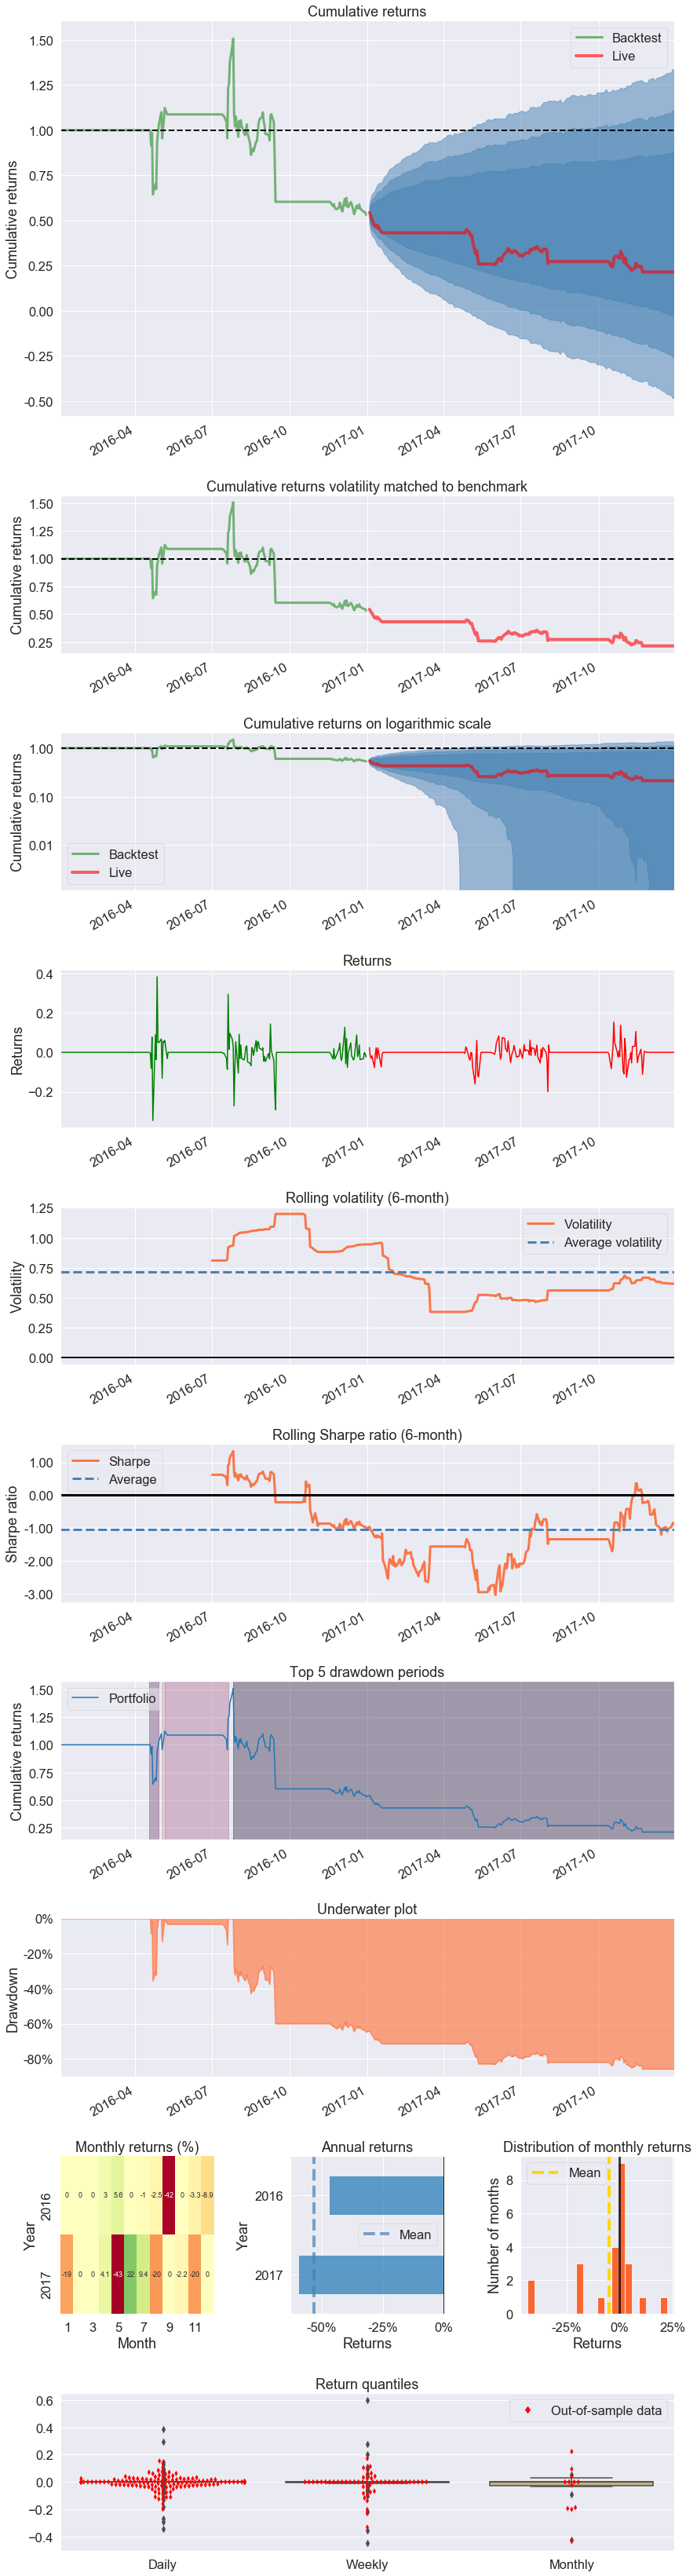

In [9]:
pf.create_returns_tear_sheet(returns,live_start_date='2017-01-01')

In [10]:
pf.create_bayesian_tear_sheet(returns, live_start_date='2017-07-01')

/anaconda3/envs/env_alphatools_stable/lib/python3.5/site-packages/pyfolio/tears.py:1165: UserWarning: The latest version of pyfolio requires users to supply benchmark returns. Your current tearsheets will not include plots and analyses that require a benchmark. In the future, please pass benchmark_rets, or pass None to silence this warning.
  warnings.warn(BENCHMARK_RETS_WARNING)


Running T model


Auto-assigning NUTS sampler...
Initializing NUTS using ADVI...
Average Loss = -959.85:  22%|██▏       | 43021/200000 [00:26<01:36, 1626.36it/s]
Convergence archived at 43100
Interrupted at 43,100 [21%]: Average Loss = -348.43



You can find the C code in this temporary file: /var/folders/sz/_qcyns_12zd21tjhs7q7_29h0000gn/T/theano_compilation_error_132utmlz


Exception: ('The following error happened while compiling the node', softplus(InplaceDimShuffle{x,0}.0), '\n', "Compilation failed (return status=1): /Users/jonathan/.theano/compiledir_Darwin-17.7.0-x86_64-i386-64bit-i386-3.5.5-64/tmpqfjvc19l/mod.cpp:396:27: error: non-constant-expression cannot be narrowed from type 'npy_intp' (aka 'long') to 'int' in initializer list [-Wc++11-narrowing].     int init_totals[2] = {V1_n0, V3_n1};.                           ^~~~~. /Users/jonathan/.theano/compiledir_Darwin-17.7.0-x86_64-i386-64bit-i386-3.5.5-64/tmpqfjvc19l/mod.cpp:396:27: note: insert an explicit cast to silence this issue.     int init_totals[2] = {V1_n0, V3_n1};.                           ^~~~~.                           static_cast<int>( ). /Users/jonathan/.theano/compiledir_Darwin-17.7.0-x86_64-i386-64bit-i386-3.5.5-64/tmpqfjvc19l/mod.cpp:396:34: error: non-constant-expression cannot be narrowed from type 'npy_intp' (aka 'long') to 'int' in initializer list [-Wc++11-narrowing].     int init_totals[2] = {V1_n0, V3_n1};.                                  ^~~~~. /Users/jonathan/.theano/compiledir_Darwin-17.7.0-x86_64-i386-64bit-i386-3.5.5-64/tmpqfjvc19l/mod.cpp:396:34: note: insert an explicit cast to silence this issue.     int init_totals[2] = {V1_n0, V3_n1};.                                  ^~~~~.                                  static_cast<int>( ). /Users/jonathan/.theano/compiledir_Darwin-17.7.0-x86_64-i386-64bit-i386-3.5.5-64/tmpqfjvc19l/mod.cpp:408:12: error: non-constant-expression cannot be narrowed from type 'ssize_t' (aka 'long') to 'int' in initializer list [-Wc++11-narrowing].         0, V3_stride1, .            ^~~~~~~~~~. /Users/jonathan/.theano/compiledir_Darwin-17.7.0-x86_64-i386-64bit-i386-3.5.5-64/tmpqfjvc19l/mod.cpp:408:12: note: insert an explicit cast to silence this issue.         0, V3_stride1, .            ^~~~~~~~~~.            static_cast<int>( ). /Users/jonathan/.theano/compiledir_Darwin-17.7.0-x86_64-i386-64bit-i386-3.5.5-64/tmpqfjvc19l/mod.cpp:409:1: error: non-constant-expression cannot be narrowed from type 'ssize_t' (aka 'long') to 'int' in initializer list [-Wc++11-narrowing]. V1_stride0, V1_stride1. ^~~~~~~~~~. /Users/jonathan/.theano/compiledir_Darwin-17.7.0-x86_64-i386-64bit-i386-3.5.5-64/tmpqfjvc19l/mod.cpp:409:1: note: insert an explicit cast to silence this issue. V1_stride0, V1_stride1. ^~~~~~~~~~. static_cast<int>( ). /Users/jonathan/.theano/compiledir_Darwin-17.7.0-x86_64-i386-64bit-i386-3.5.5-64/tmpqfjvc19l/mod.cpp:409:13: error: non-constant-expression cannot be narrowed from type 'ssize_t' (aka 'long') to 'int' in initializer list [-Wc++11-narrowing]. V1_stride0, V1_stride1.             ^~~~~~~~~~. /Users/jonathan/.theano/compiledir_Darwin-17.7.0-x86_64-i386-64bit-i386-3.5.5-64/tmpqfjvc19l/mod.cpp:409:13: note: insert an explicit cast to silence this issue. V1_stride0, V1_stride1.             ^~~~~~~~~~.             static_cast<int>( ). 5 errors generated.. ", '[softplus(<TensorType(float64, row)>)]')